# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<Axes: xlabel='Age', ylabel='Tardies'>

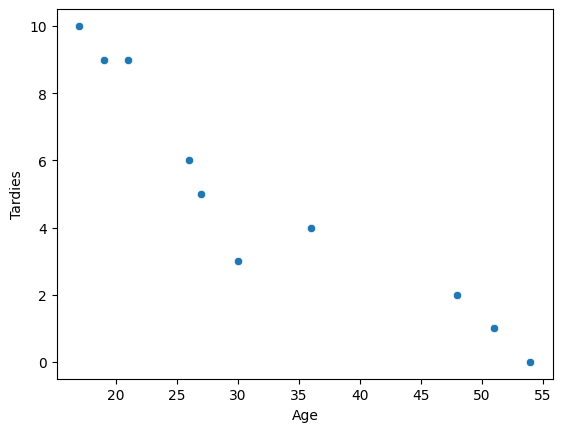

In [4]:
# Your code here
sns.scatterplot(x='Age', y='Tardies', data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*
Yes, there is a trend. When x(Age) increases, y(Tardies) decreases, which suggests a inversely proportional relationship between age and tardiness.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# your code here
#calculate covariance
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [8]:
#calculate correlation
student_data.corr().loc['Age', 'Tardies']

np.float64(-0.9391626886887123)

compare the values:
Both measures shows the inverse proportionality of the two variables. The correlation is 1 to 0.93, which suggests a strong correlation between age and tardiness.
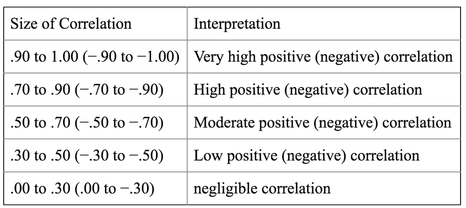

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# your explanation here

# outcome variable = y 


In [11]:
# build the regression model
X = student_data[['Age']]
y = student_data['Tardies']

#split function
from sklearn.model_selection import train_test_split

# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(10, 1) (8, 1) (2, 1)
(10,) (8,) (2,)


In [12]:
# the training phase: Fitting

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Create the Linear Regression estimator = it's my linear model. LM 
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

13.46408839779005 [-0.26657459]


Plot your regression model on your scatter plot.

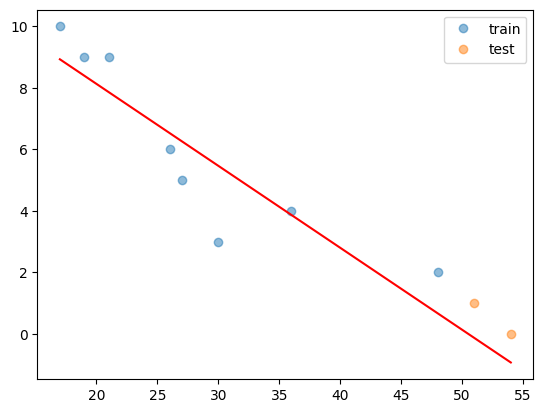

In [ ]:
# Your code here.
# Define xmin xmax for the model:
xmin, xmax = (X.min().item()), (X.max().item())

x_model = np.arange(xmin, xmax+1).reshape(-1, 1) #can only use for simple regression with 1 feature (1 x)
y_model=lm.intercept_+lm.coef_[0]*x_model # np.arange returns evenly spaced values within a given interval.

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r'); 

plt.legend()
plt.show()
# The red line gives the predicted values of this model

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*
Answers:
- Type of regression: simple linear regression. Because the correlation coefficient is very high.
- The outcome variable (y) is the Tardies column.
- Predictions: age is a good predictor of tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [26]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("/Users/work/Documents/DSML25/week_4/4.2.lab-continuous-probability-distributions-en/your-code/vehicles.csv")

In [28]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [50]:
vehicles_x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
vehicles_y = vehicles[['CO2 Emission Grams/Mile']]

In [53]:
#build DF with x and y together
data = pd.concat([vehicles_x, vehicles_y], axis=1)

In [ ]:
#calculate correlation
correlation_vehicles = data.corr()
correlation_vehicles

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [59]:
#filter correlation with target = Q1: Calculate the correlations between each of these variables and the outcome.
corr_target = correlation_vehicles['CO2 Emission Grams/Mile']
corr_target.sort_values()

Combined MPG              -0.926229
Year                      -0.222300
Cylinders                  0.752393
Fuel Cost/Year             0.930865
Fuel Barrels/Year          0.986189
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [63]:
#1. select features
vehicles_x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
vehicles_y = vehicles[['CO2 Emission Grams/Mile']]

#1.1. assign features to X and y
X = vehicles_x
y = vehicles_y

#2. Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28761, 5) (7191, 5) (28761, 1) (7191, 1)


In [ ]:
#3. initialize the model
model = LinearRegression()

#4. training the model with the fit function
model.fit(X_train, y_train)

#5. predictions
y_pred = model.predict(X_test)

MSE test:  0.0001241246943336641


In [69]:
#6. evaluation the model = metrics
from sklearn.metrics import r2_score, mean_squared_error

#MSE test
    #mse_test = np.mean(y_pred - y_test)**2
MSE = mean_squared_error(y_test, y_pred)
print("MSE test: ", mse_test)

#R squared Rˆ2
r_squared = r2_score(y_test, y_pred)
print(f"R^2: {r_squared:.4f}")

MSE test:  0.0001241246943336641
R^2: 0.9783


In [70]:
#regression summary print
import statsmodels.api as sm

ols_model = sm.OLS(y_train, X_train).fit()
ols_summary = ols_model.summary()
print(ols_summary)

                                   OLS Regression Results                                   
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          5.033e+06
Date:                     Thu, 29 May 2025   Prob (F-statistic):                        0.00
Time:                             17:21:34   Log-Likelihood:                     -1.2152e+05
No. Observations:                    28761   AIC:                                  2.430e+05
Df Residuals:                        28756   BIC:                                  2.431e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.
- Answers:
- Most important predictor: Fuel Barrels/Year because it has the highest correlation coefficient with the target. (absolute value, doesn't matter positive or negative)
- Less useful: Year = lowest correlation coefficient.
- R squared is high, which means the model is perfoming well. 
- the summary is printed above.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*